![](ITD.png)
    
# Analisis Inteligente de Datos
## Regresión logísitca visitas a un sitio WEB

### Nombre del Docente
### Ruben Pizarro

### Nombre del Alumno
### Jose Guadalupe Calderon Perez

### Fecha: 04/Diciembre/2020

### Objetivo

Alicar el algoritmo de regresión logística para clasificar si un usuario con ciertas características reñacionadoas con las visitas a un sitio WEB  utiliza como sistema operativo Windows, Macintosh o Linux.

### Descripcíon

Se utilIza mediante comandos e instrucciones de Python el algorotmo regresión logística para clasificar si un usuario con ciertas características relacionadoas con las visitas a un sitio WEB  utiliza como sistema operativo Windows, Macintosh o Linux.

### Fundamento teórico

¿Que son los algortimos de clasificación?

¿En dónde se aplican los algoritmos de clasificación?

¿Algunos ejemplos de aplicación de algoritmos de clasificación?

A partir de un conjunto de datos de entrada (características), se puede clasificar conforme a una etiqueta de salida, se puede utilizar un algoritmo regresión logística para claisificar datos. 

La regresión logística es un algoritmo supervisado y se utiliza para clasificación. Las etiquetas pueden ser “SI/NO”: binario o un número finito de "valores" o "etiquetas" o "clases": múltiple. [Bagnato, 2020]

Un algorimto de clasificación es el proceso de identificar categoría de observación (establecido) sobre la base de la formación del conjunto de datos que contiene observaciones de las cuales las
categorías son desconocidas [Suca, 2016].

## 1. Cargar librerias.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## 2. Cargar Datos

In [2]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
## Visualizar los primeros 10 registros.
dataframe.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


In [3]:
## Visualizar los ultimos 10 registros.
dataframe.tail(10)

,duracion,paginas,acciones,valor,clase
160,11.0,1,3,15,0
161,13.0,1,6,30,0
162,12.0,1,4,24,0
163,11.0,1,7,35,0
164,13.0,1,4,8,0
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0
169,12.0,1,6,18,0


## 3. Descripción de los datos

### La llamada clase es la etiqueta o variable dependiente tipo discreta que puede tener los siguientes valores:

* 0 - Windows
* 1 - Macintosh
* 2 - Linux

### Las variables independientes son:

* Duración de la visita en segundos
* Cantidad de páginas vistas durante la Sesión
* Cantidad de acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
* Suma del valor de las acciones (cada acción lleva asociada una valoración de importancia)

In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


¿Cuál es la cantidad de registros de clase 0, 1 y 2?

In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## 4. Visualizar datos
Se presentan los histogramas de las características y variables independientes del conjunto de datos: duración, páginas, aciones, valor. Siendo estas variables numéricas el diagrama recomendable es el histograma

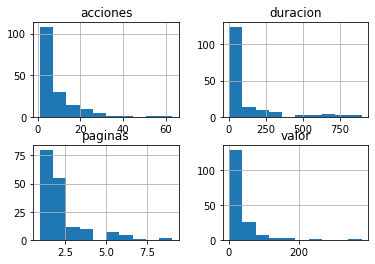

In [6]:
dataframe.drop(['clase'],1).hist()
plt.show()

Se muestra la interrelación de las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

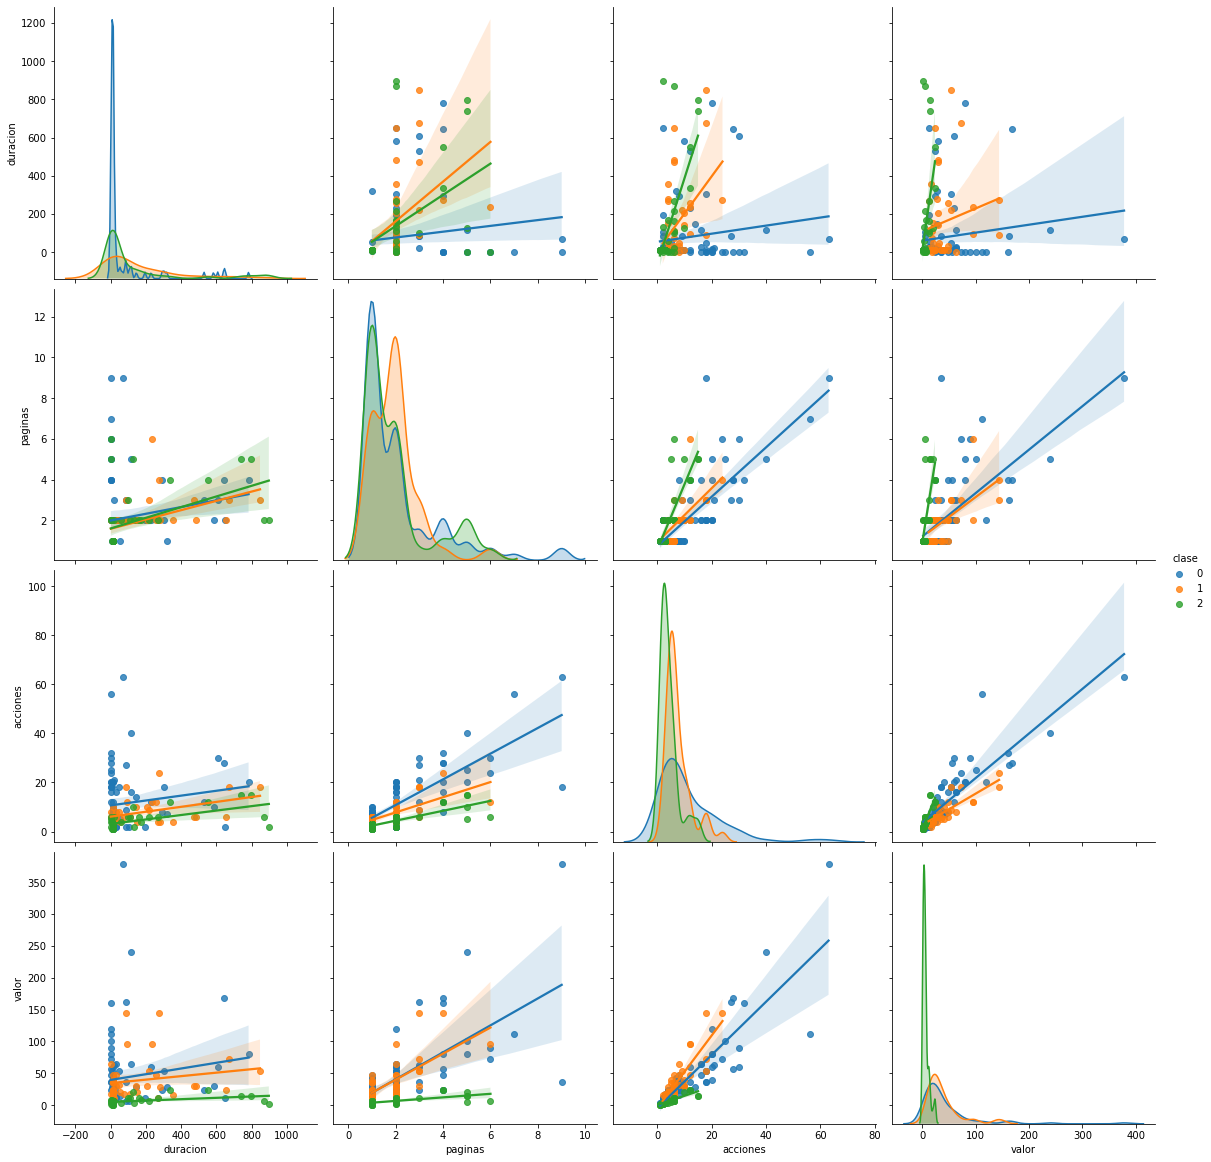

In [7]:
import warnings
warnings.filterwarnings("ignore")
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

## Modelo de Regresión Logística.

Se cargan las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio se agrega la columna “clase” en la variable y. Se ejeuta X.shape para comprobar la dimensión de la matriz con datos de entrada de 170 registros por 4 columnas.

In [8]:
X = np.array(dataframe.drop(['clase'],1))
Y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [9]:
# Se crea el modelo de regresión logística con la variable Y y con ajuste (fit) del conjunto de entradas 'X' y salidas 'y'.
modelo = linear_model.LogisticRegression()
modelo.fit(X,Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

NameError: name 'LogisticRegression' is not defined

## Realizar predicciones.

In [10]:
predicciones = modelo.predict(X)

dataframe['prediccion'] = predicciones

dataframe.loc[0:50, ['duracion', 'paginas', 'acciones', 'valor', 'clase', 'prediccion']] # Columna clase

,duracion,paginas,acciones,valor,clase,prediccion
0,7.000,2,4,8,2,2
1,21.000,2,6,6,2,2
2,57.000,2,4,4,2,2
3,101.000,3,6,12,2,2
4,109.000,2,6,12,2,2
5,125.000,5,10,20,2,2
6,133.000,2,2,4,2,2
7,162.000,2,6,12,2,2
8,170.000,2,4,8,2,2
9,217.000,2,6,6,2,2


## Evaluar el modelo
Con la función model.score() se evalúa que tan bueno es el modelo

In [11]:
print("El modelo es preciso en un ", round(modelo.score(X,Y) * 100, 4), "%")

El modelo es preciso en un  78.2353 %


En Machine Learning subdividir el conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que el algoritmo pueda fallar por “sobregeneralizar” el conocimiento. Para ello, se dividen los datos de entrada en forma aleatoria (mezclados) utilizando 70% u 80% de registros para entrenamiento y 30% o 20% para validar [Bagnato, 2020].

In [12]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(modelo, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.728571 (0.094186)


Con el 80% de los datos entrada el modelo de regesión logística es capaz de ser preciso en un 72%.

Se haen predicciones con el conjunto de datos de validación

In [14]:
predicciones = modelo.predict(X_validation)
print(accuracy_score(Y_validation, predicciones))

0.8529411764705882


La "matriz de confusión" muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows [Bagnato, 2020].

In [15]:
print(confusion_matrix(Y_validation, predicciones))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


También podemos ver el reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux (total de 34 registros). Podemos ver la precisión con que se acertaron cada una de las clases y vemos que por ejemplo de Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). La valoración que de aqui nos conviene tener en cuenta es la de F1-score⁷⁰, que tiene en cuenta la precisión y recall. El promedio de F1 es de 84% lo cual no está nada mal. [Bagnato, 2020].

In [16]:
print(classification_report(Y_validation, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



## Predicción con nuevos valores

* Tiempo Duración: 60
* Paginas visitadas: 20
* Acciones al navegar: 30
* Valoración: 100

In [17]:
X_new = pd.DataFrame({'duracion': [60], 'paginas': [20], 'acciones': [30], 'valor': [100]})
print("La predicción es de tipo sistema operativo: ", modelo.predict(X_new))

La predicción es de tipo sistema operativo:  [0]


* 0 - Windows
* 1 - Macintosh
* 2 - Linux

## Interpretación del caso.
Como se indicó en el objetivo lo que buscábamos era poder clasificar si un usuario con ciertas características realizo visitas a un sitio web desde un sistema operativo en específico, como opciones de sistemas operativos se manejó de la siguiente manera:

* 0 - Windows
* 1 - Macintosh
* 2 - Linux

A partir de un conjunto de datos llamado "usuarios_win_mac_lin.csv" creamos nuestro modelo de regresión logística cargando los 170 registros y las 4 variables necesarias (duración, paginas, acciones y valor) obteniendo una precisión de un 78.23% dado el conjunto de datos analizado y ya una vez entrenado nuestro modelo para futuras predicciones.

Por ejemplo, dado los nuevos valores (Tiempo Duración: 60, Páginas visitadas: 20, Acciones al navegar: 30 y Valoración: 100) nuestro modelo nos dio como resultado el valor de 0 dando a entender que un usuario con esas características realizo la navegación desde un sistema operativo Windows.